<a href="https://colab.research.google.com/github/Kyvelos/Thesis/blob/main/THESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kyvelos/Thesis.git

Cloning into 'Thesis'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 23 (delta 6), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 9.25 KiB | 3.08 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
!git pull origin main


fatal: not a git repository (or any of the parent directories): .git


In [8]:
!rm -rf /content/Thesis


In [3]:
%ls

02_Thesis/  drive/  sample_data/  Thesis/


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install pynrrd numpy matplotlib ipywidgets  google.colab


Dropdown(description='Patient', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', …

Button(description='Load Patient', style=ButtonStyle())

IntSlider(value=212, description='Slice', max=424)

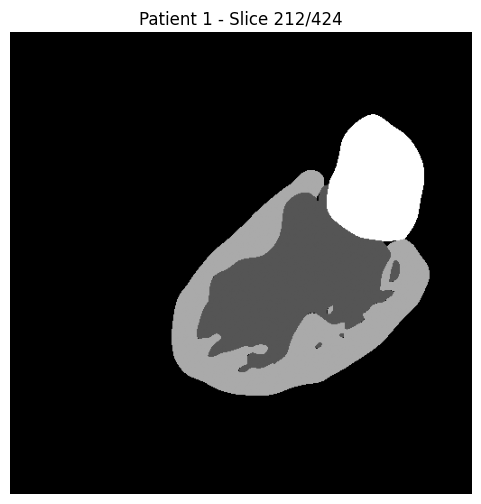

In [9]:

#This is a second test message
import nrrd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import ipywidgets as widgets
from IPython.display import display



# Define patient numbers
patients = range(1, 21)

# Directory path format for NRRD files
base_path = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter/Patient 1/Segmentation.seg.nrrd"

# Dropdown for patient selection
patient_dropdown = widgets.Dropdown(options=[str(p) for p in patients], description="Patient")

# Function to display selected patient data
def display_patient(patient_num):
    file_path = base_path.format(patient_num)
    try:
        data, header = nrrd.read(file_path)
        total_slices = data.shape[2]

        fig, ax = plt.subplots(figsize=(6, 6))
        slice_idx = total_slices // 2
        img = ax.imshow(data[:, :, slice_idx], cmap="gray")
        ax.set_title(f"Patient {patient_num} - Slice {slice_idx}/{total_slices - 1}")
        ax.axis("off")

        # Slider for slices
        slice_slider = widgets.IntSlider(value=slice_idx, min=0, max=total_slices - 1, description="Slice")

        def update(change):
            img.set_data(data[:, :, slice_slider.value])
            ax.set_title(f"Patient {patient_num} - Slice {slice_slider.value}/{total_slices - 1}")
            fig.canvas.draw_idle()

        slice_slider.observe(update, names="value")
        display(slice_slider)
        plt.show()

    except Exception as e:
        print(f"Error loading Patient {patient_num}: {e}")

# Button to confirm selection
def on_button_click(b):
    display_patient(int(patient_dropdown.value))

button = widgets.Button(description="Load Patient")
button.on_click(on_button_click)

display(patient_dropdown, button)


In [10]:
!rm -rf /content/02_Thesis /content/Thesis


In [11]:
!git clone https://github.com/Kyvelos/02_Thesis.git /content/02_Thesis


Cloning into '/content/02_Thesis'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 23 (delta 6), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 9.25 KiB | 9.25 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [12]:
%cd /content/02_Thesis


/content/02_Thesis


In [14]:
!ls -R


.:
README.md  SRC

./SRC:
My_project.py  THESIS.ipynb
